In [1]:
!pip install pystan==2.19.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 53.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=29422067 sha256=587dcc1c86734498f33839d4c5f7fc07f2af88951fbb5cf0e1ab6327fe8d10b7
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [2]:
import pystan

In [3]:
import warnings
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from scipy import stats
from scipy.optimize import curve_fit

warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
!git clone --depth=1 https://github.com/MatsuuraKentaro/RStanBook.git

Cloning into 'RStanBook'...
remote: Enumerating objects: 535, done.
remote: Counting objects: 100% (535/535), done.
remote: Compressing objects: 100% (501/501), done.
remote: Total 535 (delta 49), reused 390 (delta 31), pack-reused 0
Receiving objects: 100% (535/535), 6.81 MiB | 29.81 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [5]:
attendance_3 = pd.read_csv('/kaggle/working/RStanBook/chap05/input/data-attendance-3.txt')
print(attendance_3.head())
print(attendance_3.describe())

   PersonID  A  Score Weather  Y
0         1  0     69       B  1
1         1  0     69       A  1
2         1  0     69       C  1
3         1  0     69       A  1
4         1  0     69       B  1
          PersonID            A        Score            Y
count  2396.000000  2396.000000  2396.000000  2396.000000
mean     24.217028     0.464942   122.856427     0.718698
std      13.996647     0.498874    25.700545     0.449728
min       1.000000     0.000000    51.000000     0.000000
25%      12.000000     0.000000   106.000000     0.000000
50%      23.000000     0.000000   122.000000     1.000000
75%      36.000000     1.000000   145.000000     1.000000
max      50.000000     1.000000   185.000000     1.000000


In [6]:
# 新しい列を追加し、条件に応じて値を割り当てる
attendance_3['weth'] = attendance_3['Weather'].map({'A': 0, 'B': 0.2, 'C': 1})

In [7]:
attendance_3

,PersonID,A,Score,Weather,Y,weth
0,1,0,69,B,1,0.2
1,1,0,69,A,1,0.0
2,1,0,69,C,1,1.0
3,1,0,69,A,1,0.0
4,1,0,69,B,1,0.2
...,...,...,...,...,...,...
2391,50,1,99,B,1,0.2
2392,50,1,99,A,1,0.0
2393,50,1,99,A,1,0.0
2394,50,1,99,C,1,1.0


In [8]:
code5_5 = """
data {
  int I;
  int<lower=0, upper=1> A[I];
  real<lower=0, upper=1> Score[I];
  real<lower=0> W[I];
  int<lower=0> Y[I];
}

parameters {
  real b[4];
}

transformed parameters {
  real q[I];
  for (i in 1:I)
    q[i] = inv_logit(b[1] + b[2]*A[i] + b[3]*Score[i] + b[4]*W[i]);
}

model {
  for (i in 1:I)
    Y[i] ~ bernoulli(q[i]);
}
"""

In [9]:
# データ準備
# スケーリング
Score = attendance_3['Score']/200

A = attendance_3['A']
W = attendance_3['weth']
Y = attendance_3['Y']
I = len(Y)

stan_data = {
    'I': I,
    'Score': Score,
    'A': A,
    'W': W,
    'Y': Y,
}

In [10]:
stan_model = pystan.StanModel(model_code=code5_5)

In file included from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /tmp/pystan_ft7op2c9/stanfit4anon_model_dfe32837396dc22a393129c2af0a2645_8955679654972026012.cpp:1280:
/opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /opt/conda/lib/python3.10/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/prob/poisson_log_glm_log.hpp:5,
                 from /opt/conda/lib/python3.10/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:33

In [11]:
fit = stan_model.sampling(data=stan_data, iter=2000, chains=4, seed=1234)


Gradient evaluation took 0.001076 seconds
1000 transitions using 10 leapfrog steps per transition would take 10.76 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000939 seconds
1000 transitions using 10 leapfrog steps per transition would take 9.39 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000769 seconds
1000 transitions using 10 leapfrog steps per transition would take 7.69 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.001188 seconds
1000 transitions using 10 leapfrog steps per transition would take 11.88 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000

In [12]:
fit.summary

<bound method StanFit4Model.summary of 
For the full summary use 'print(fit)'

Inference for Stan model: anon_model_dfe32837396dc22a393129c2af0a2645.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b[1]    0.17  4.8e-3   0.23  -0.26   0.02   0.18   0.33   0.61   2269    1.0
b[2]   -0.62  1.7e-3   0.09  -0.81  -0.68  -0.62  -0.56  -0.44   2835    1.0
b[3]    1.95  7.6e-3   0.37   1.25    1.7   1.95    2.2   2.68   2296    1.0
b[4]   -0.46  2.2e-3   0.12   -0.7  -0.54  -0.46  -0.38  -0.22   3050    1.0
q[1]    0.68  5.0e-4   0.02   0.63   0.66   0.68    0.7   0.73   2429    1.0
q[2]     0.7  4.9e-4   0.02   0.65   0.68    0.7   0.72   0.74   2421    1.0
q[3]     0.6  6.8e-4   0.04   0.53   0.57    0.6   0.62   0.66   2765    1.0
q[4]     0.7  4.9e-4   0.02   0.65   0.68    0.7   0.72   0.74   2421    1.0
q[5]    0.68  5.0e-4   0.02   0.63   0.

In [13]:
code5_6 = """
data {
  int I;
  int<lower=0, upper=1> A[I];
  real<lower=0, upper=1> Score[I];
  real<lower=0> W[I];
  int<lower=0> Y[I];
}

parameters {
  real b[4];
}

transformed parameters {
  real q[I];
  for (i in 1:I)
    q[i] = inv_logit(b[1] + b[2]*A[i] + b[3]*Score[i] + b[4]*W[i]);
}

model {
  for (i in 1:I)
    Y[i] ~ bernoulli_logit(b[1] + b[2]*A[i] + b[3]*Score[i] + b[4]*W[i]);
}
"""

In [14]:
stan_model = pystan.StanModel(model_code=code5_6)

In file included from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /tmp/pystan_h640y61v/stanfit4anon_model_373712bb370b39e693e72f8fb821aaf0_1936604325935915862.cpp:1280:
/opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /opt/conda/lib/python3.10/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/prob/poisson_log_glm_log.hpp:5,
                 from /opt/conda/lib/python3.10/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:33

In [15]:
fit = stan_model.sampling(data=stan_data, iter=2000, chains=4, seed=1234)


Gradient evaluation took 0.001313 seconds
1000 transitions using 10 leapfrog steps per transition would take 13.13 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.001611 seconds
1000 transitions using 10 leapfrog steps per transition would take 16.11 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.001493 seconds
1000 transitions using 10 leapfrog steps per transition would take 14.93 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.001439 seconds
1000 transitions using 10 leapfrog steps per transition would take 14.39 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 20

In [16]:
fit.summary

<bound method StanFit4Model.summary of 
For the full summary use 'print(fit)'

Inference for Stan model: anon_model_373712bb370b39e693e72f8fb821aaf0.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%     25%    50%    75%  97.5%  n_eff   Rhat
b[1]    0.17  5.0e-3   0.23  -0.27 10.0e-3   0.17   0.32   0.62   2088    1.0
b[2]   -0.62  1.9e-3   0.09  -0.81   -0.68  -0.62  -0.56  -0.43   2485    1.0
b[3]    1.95  8.0e-3   0.37   1.23    1.71   1.96    2.2   2.67   2098    1.0
b[4]   -0.46  2.3e-3   0.12   -0.7   -0.54  -0.46  -0.38  -0.22   2804    1.0
q[1]    0.68  5.2e-4   0.02   0.63    0.66   0.68    0.7   0.73   2255    1.0
q[2]     0.7  5.2e-4   0.02   0.65    0.68    0.7   0.72   0.74   2233    1.0
q[3]    0.59  6.9e-4   0.04   0.52    0.57    0.6   0.62   0.66   2639    1.0
q[4]     0.7  5.2e-4   0.02   0.65    0.68    0.7   0.72   0.74   2233    1.0
q[5]    0.68  5.2e-4   0.02   

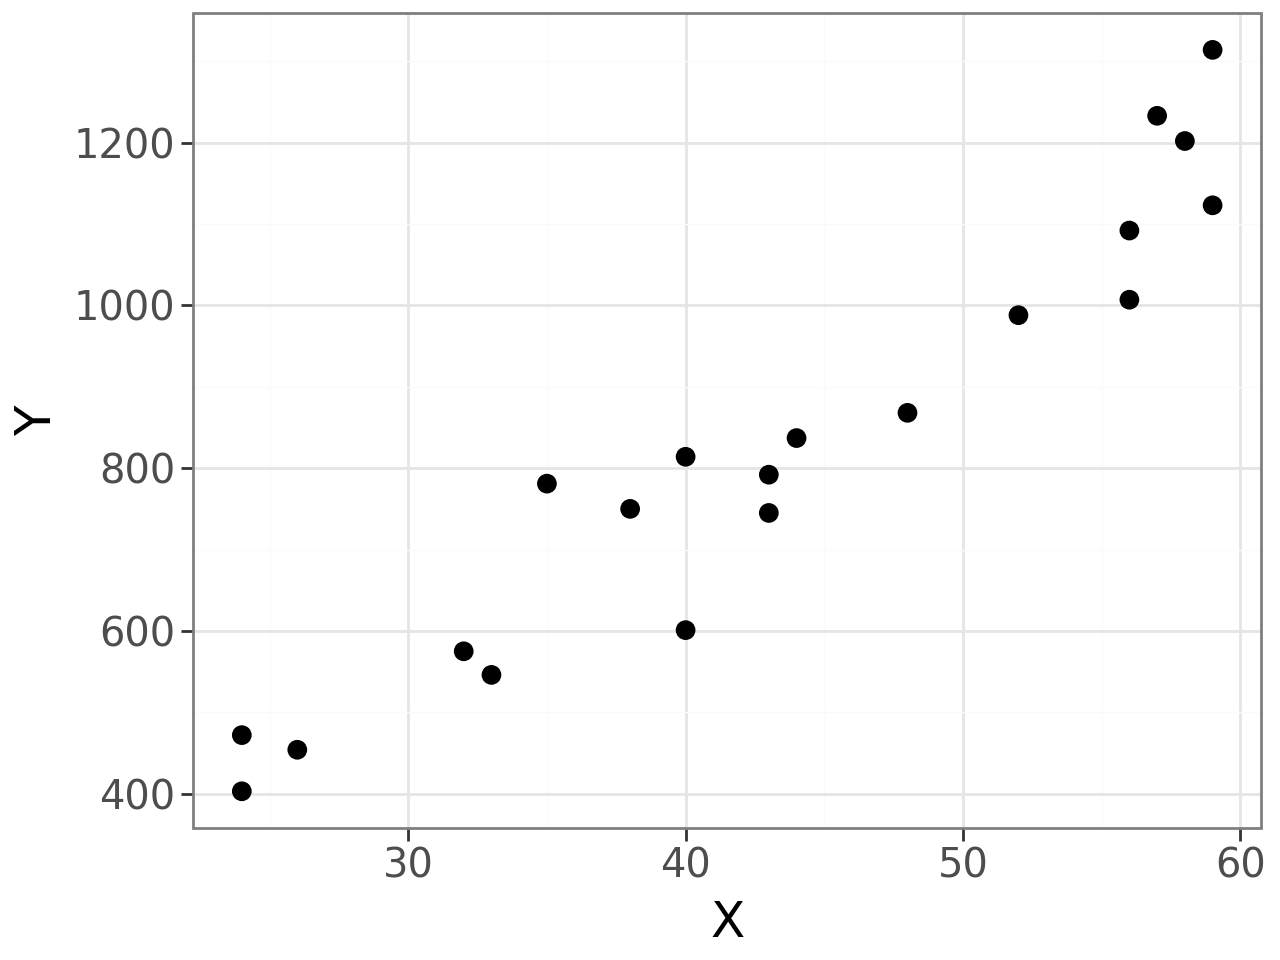

In [19]:
import pandas
from plotnine import ggplot, aes, theme_bw, geom_point

d = pandas.read_csv('/kaggle/working/RStanBook/chap04/input/data-salary.txt')
p = (ggplot(d, aes('X', 'Y'))
    + theme_bw(base_size=18)
    + geom_point(shape='o', size=3))
p